In [15]:
import numpy as np
import matplotlib.pyplot as plt

def true_function(X):
    return np.cos(X)

# Define the RBF (Radial Basis Function) kernel (Gaussian Kernel)
# Computes the RBF (Gaussian) kernel between two vectors X1 and X2.
# X1 : numpy array 1D (size=n)
# X2 : numpy array 1D (size=m)
# lambda() : Kernel coefficient for RBF
# returns:
# K : numpy array of shape (size of X1=n, size of X2=m).

def rbf_kernel(X1, X2, lambda_param=1.0):
    # Compute the squared Euclidean distance between each pair of points in X1 and X2
    dist_sq = np.sum((X1[:, np.newaxis] - X2)**2, axis=0)

    # Compute the RBF kernel using the squared distance and lambda_param
    K = np.exp(-0.5 * dist_sq / lambda_param**2)

    return K

# Example usage
X1 = np.array([1.0, 2.0, 3.0])  # Example input vector 1
X2 = np.array([1.5, 2.5, 3.5])  # Example input vector 2

# Compute the RBF kernel between X1 and X2 with lambda_param=1.0
kernel_matrix = rbf_kernel(X1, X2, lambda_param=1.0)
print("RBF Kernel Matrix:", kernel_matrix)

RBF Kernel Matrix: [0.2528396  0.2528396  0.01258814]


In [24]:
import numpy as np

# Define the true function (error function)
def true_function(X):
    return np.cos(X)

# Define the RBF (Radial Basis Function) kernel
def rbf_kernel(X1, X2, lambda_param=1.0):
    # Reshape X1 and X2 to 2D arrays if necessary
    X1 = X1.reshape(-1, 1) if X1.ndim == 1 else X1
    X2 = X2.reshape(-1, 1) if X2.ndim == 1 else X2

    dist_sq = np.sum((X1[:, np.newaxis, :] - X2[np.newaxis, :, :])**2, axis=2)
    K = np.exp(-0.5 * dist_sq / lambda_param**2)
    return K


# Define the Gaussian Process Regression function
def gaussian_regression(X_train, y_train, X_test, lambda_param=1.0):

    K_train = rbf_kernel(X_train, X_train, lambda_param)
    K_train_test = rbf_kernel(X_train, X_test, lambda_param)
    K_test = rbf_kernel(X_test, X_test, lambda_param)
    K_train_inv = np.linalg.inv(K_train + 1e-8 * np.eye(len(X_train)))

    # Reshape y_train to a column vector
    y_train = y_train.reshape(-1, 1)

    mean = K_train_test.T @ K_train_inv @ y_train

    cov = K_test - K_train_test.T @ K_train_inv @ K_train_test

    return mean, cov

X_train = np.array([[1], [3], [5], [6], [7], [8]])
y_train = true_function(X_train).ravel()

# Let’s estimate the error function value when x=2.2
X_test = np.array([[2.2]])

# Use the Gaussian regression function to estimate the mean and covariance for X_test
mean, cov = gaussian_regression(X_train, y_train, X_test)

# Compute the standard deviation (s.d.) of the test point (diagonal value of covariance is variance)
std_dev = np.sqrt(np.diagonal(cov))

print("Posterior Mean for X_test:", mean)
print("Posterior Covariance for X_test:", cov)
print("Standard Deviation for X_test:", std_dev)


Posterior Mean for X_test: [[-0.45507075]]
Posterior Covariance for X_test: [[0.31042434]]
Standard Deviation for X_test: [0.55715737]


In [25]:
# Let’s estimate the error function value when x=3.4
X_test = np.array([[3.4]])

# Use the Gaussian regression function to estimate the mean and covariance for X_test
mean, cov = gaussian_regression(X_train, y_train, X_test)

# Compute the standard deviation (s.d.) of the test point (diagonal value of covariance is variance)
std_dev = np.sqrt(np.diagonal(cov))

print("Posterior Mean for X_test:", mean)
print("Posterior Covariance for X_test:", cov)
print("Standard Deviation for X_test:", std_dev)


Posterior Mean for X_test: [[-0.94893688]]
Posterior Covariance for X_test: [[0.10800931]]
Standard Deviation for X_test: [0.3286477]


In [26]:
# Define the test points (X_test) as a linspace between 0 and 10
X_test = np.linspace(0, 10, 10).reshape(-1, 1)

mean, cov = gaussian_regression(X_train, y_train, X_test)

std_dev = np.sqrt(np.diagonal(cov))

# Print the mean and standard deviation vectors
print("Mean value vector for X_test:")
print(mean)
print("\nStandard Deviation vector for X_test:")
print(std_dev)


Mean value vector for X_test:
[[ 0.40491767]
 [ 0.50056765]
 [-0.47790599]
 [-0.9701294 ]
 [-0.19629436]
 [ 0.71625329]
 [ 0.95751846]
 [ 0.02813736]
 [-0.35146783]
 [-0.09207455]]

Standard Deviation vector for X_test:
[0.79172702 0.10533333 0.55029413 0.2811291  0.34397489 0.11437173
 0.0861215  0.0919198  0.64547158 0.98462377]


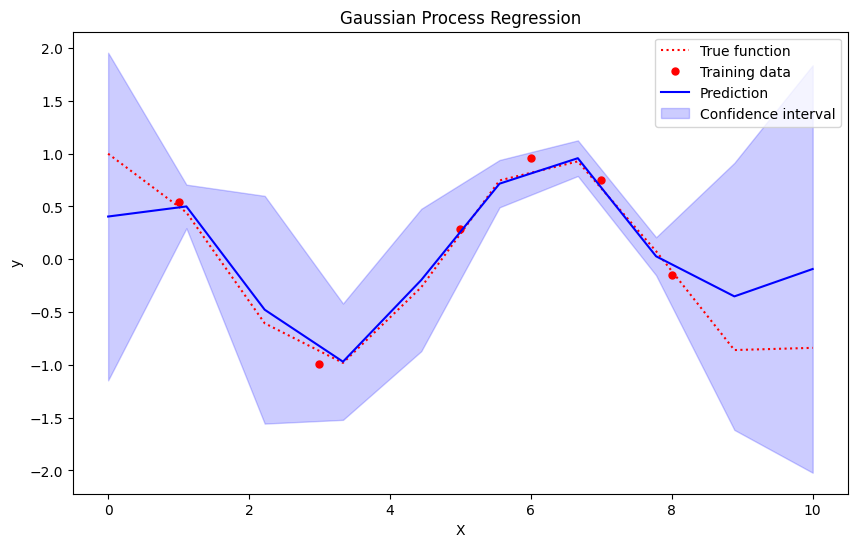

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, true_function(X_test), 'r:', label="True function")
plt.plot(X_train, y_train, 'r.', markersize=10, label="Training data")
plt.plot(X_test, mean, 'b-', label="Prediction")
plt.fill_between(X_test.ravel(), mean.ravel() - 1.96*std_dev, mean.ravel() + 1.96*std_dev, alpha=0.2, color='b', label="Confidence interval")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

In [29]:
beta = 1.96
LCB = mean - beta * std_dev

for i, x_val in enumerate(X_test.ravel()):
    print(f"X_test = {x_val}, LCB = {LCB[i]}")


X_test = 0.0, LCB = [-1.14686728  0.19846435 -0.67365881 -0.14609536 -0.26927312  0.18074908
  0.23611953  0.22475486 -0.86020662 -1.52494492]
X_test = 1.1111111111111112, LCB = [-1.0512173   0.29411433 -0.57800884 -0.05044539 -0.17362314  0.27639905
  0.3317695   0.32040483 -0.76455665 -1.42929494]
X_test = 2.2222222222222223, LCB = [-2.02969095 -0.68435931 -1.55648248 -1.02891903 -1.15209679 -0.70207459
 -0.64670414 -0.65806881 -1.74303029 -2.40776858]
X_test = 3.3333333333333335, LCB = [-2.52191435 -1.17658272 -2.04870589 -1.52114244 -1.64432019 -1.19429799
 -1.13892754 -1.15029221 -2.23525369 -2.89999199]
X_test = 4.444444444444445, LCB = [-1.74807932 -0.40274768 -1.27487085 -0.7473074  -0.87048516 -0.42046296
 -0.36509251 -0.37645718 -1.46141866 -2.12615696]
X_test = 5.555555555555555, LCB = [-0.83553167  0.50979997 -0.3623232   0.16524025  0.04206249  0.49208469
  0.54745514  0.53609047 -0.54887101 -1.2136093 ]
X_test = 6.666666666666667, LCB = [-0.5942665   0.75106514 -0.1210580